In [1]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
weather = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_IoT_dataset/IoT_Weather.csv')
weather.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [4]:
weather.drop('type', axis = 1, inplace=True)
weather.drop(weather.iloc[:, 0:2], axis = 1, inplace=True)
weather.head()

,temperature,pressure,humidity,label
0,31.788508,1.035,32.036579,0
1,41.630997,1.035,30.886165,0
2,42.256959,1.035,19.755908,0
3,49.116581,1.035,78.949621,0
4,24.017085,1.035,40.001059,0


In [5]:
# import matplotlib.pyplot as plt
# columns = mBusData.columns
# for col in columns:
#     print("col: ", col)
#     mBusData[col].hist(bins = 100)
#     plt.show()

<AxesSubplot: >

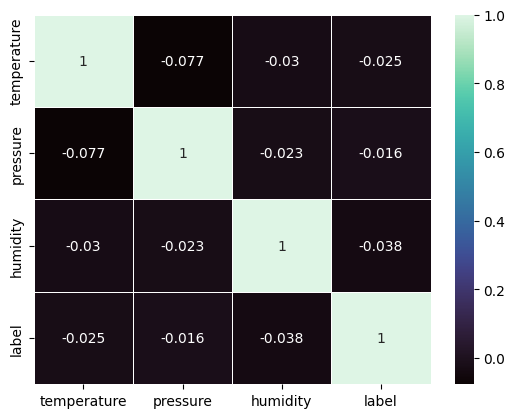

In [6]:
sns.heatmap(weather.corr(), annot=True, linewidth = 0.5, cmap='mako')

# **Train Test with Skfold**

In [5]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

x=weather[['temperature',	'pressure',	'humidity']]
y=weather['label' ]

In [6]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions

#Accuracy Score

from sklearn.metrics import accuracy_score
knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN: ",knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN: ",knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
print('AUC Score of KNN:',knnAuc)

[0 0 0 ... 0 0 0]
Accuracy of KNN:  94.47
f1_score of KNN:  79.24
AUC Score of KNN: 86.64


<AxesSubplot: >

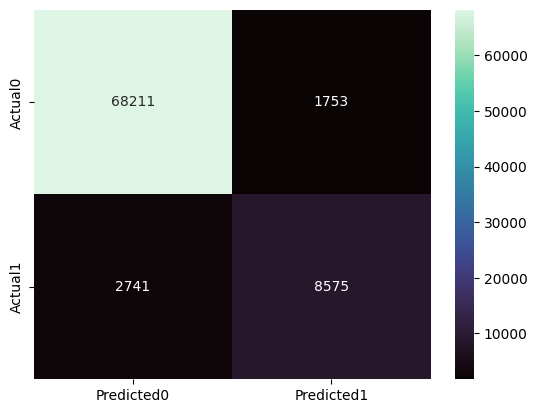

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

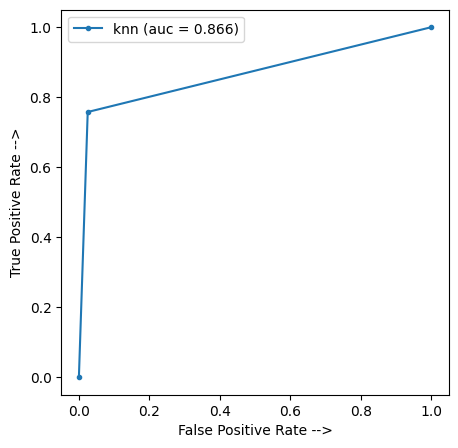

In [8]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Oversampling

In [9]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 489754, 1: 79208}
After oversampling {0: 489754, 1: 489754}


In [10]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
ovr_knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN after oversampling:",ovr_knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
ovr_knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN after oversampling:",ovr_knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
ovr_knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
print('AUC Score of KNN after oversampling:', ovr_knnAuc)

[0 0 0 ... 1 1 1]
Accuracy of KNN after oversampling: 96.2
f1_score of KNN after oversampling: 96.28
AUC Score of KNN after oversampling: 96.2


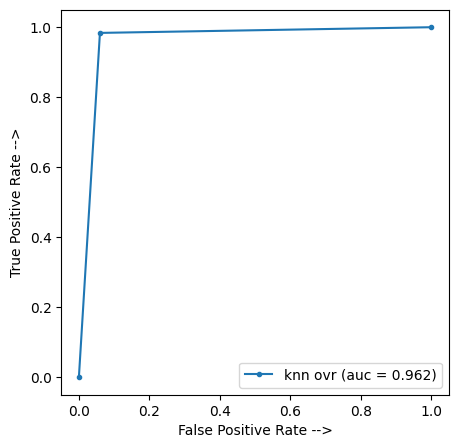

In [11]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn ovr (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

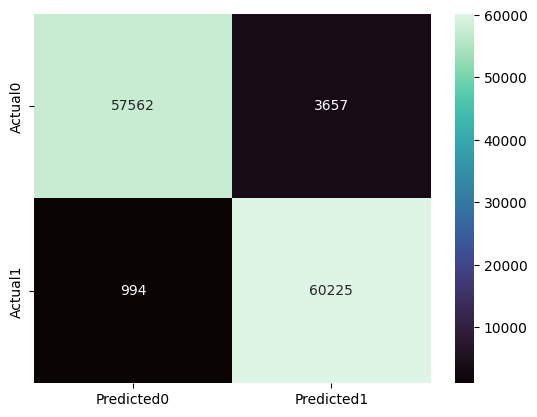

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

# Undersampling

In [12]:
for train_index, test_index in skf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_undsampled, y_undsampled = rus.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_undsampled))

Before undersampling Counter({0: 489754, 1: 79208})
After undersampling Counter({0: 79208, 1: 79208})


In [13]:
for train_index, test_index in skf.split(x_undsampled, y_undsampled):
    x_train, x_test, y_train, y_test = x_undsampled.iloc[train_index], x_undsampled.iloc[test_index], y_undsampled.iloc[train_index], y_undsampled.iloc[test_index]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
und_knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN undersampled : ",und_knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
und_knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN undersampled: ",und_knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
try:
  und_knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
  print('AUC Score of KNN undersampled:', und_knnAuc)
except ValueError:
    pass



[1 0 0 ... 1 1 1]
Accuracy of KNN undersampled :  85.39
f1_score of KNN undersampled:  86.04
AUC Score of KNN undersampled: 85.39


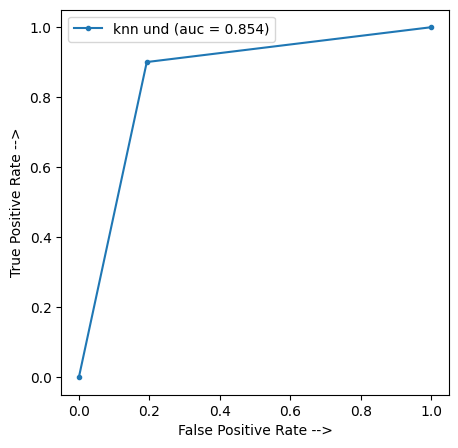

In [14]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn und (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

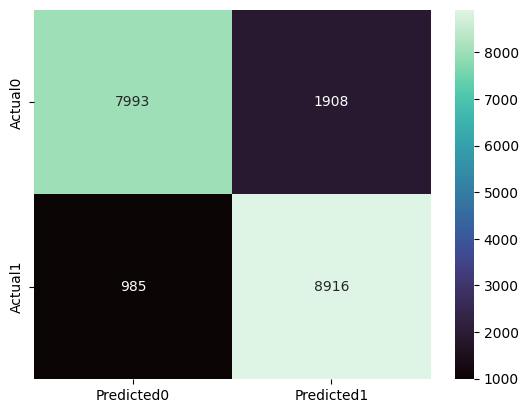

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

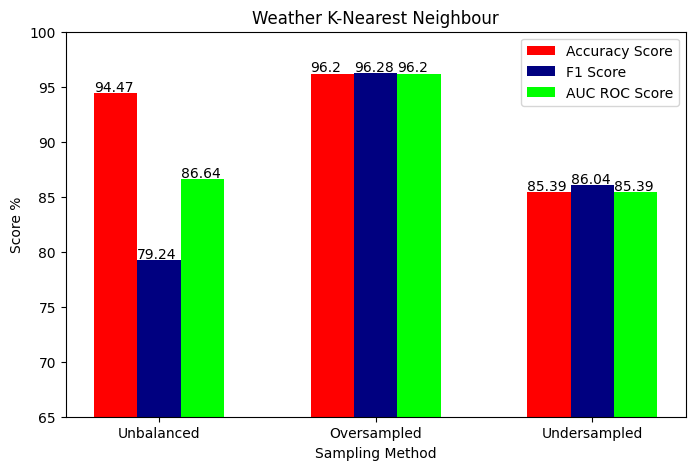

In [16]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [knnAccuracy, ovr_knnAccuracy, und_knnAccuracy]
all_f1_scores = [knnF1, ovr_knnF1, und_knnF1]
all_auc_roc_scores = [knnAuc, ovr_knnAuc, und_knnAuc]

x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Weather K-Nearest Neighbour')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([65, 100])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()